# Modelo predictivo de Regresión Logistica

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el m delo.
5. Entrenar el modelo configurando los diferentes hiperpar metros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos..

In [1]:
# Importación de la biblioteca pandas para la manipulación y análisis de datos
import pandas as pd # type: ignore
# Importación de la biblioteca numpy para operaciones matemáticas y manipulación de matrices
import numpy as np # type: ignore
# Importación de la biblioteca seaborn para visualización de datos estadísticos
import seaborn as sns # type: ignore
# Importación de la biblioteca matplotlib.pyplot para trazar gráficos
import matplotlib.pyplot as plt # type: ignore
# Importación de métricas de evaluación de modelos de aprendizaje automático de scikit-learn
from sklearn import metrics # type: ignore
# Importación de la función train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split # type: ignore
# Importación de la clase LogisticRegression de scikit-learn para construir modelos de regresión logística
from sklearn.linear_model import LogisticRegression # type: ignore
# Importación de funciones adicionales de evaluación de modelos de scikit-learn
from sklearn.metrics import classification_report, confusion_matrix # type: ignore


# Punto 1. 
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [2]:
# Lectura de datos desde un archivo CSV utilizando pandas
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
# Mostrar las primeras 50 filas de los datos
Datos.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Obtener un resumen estadístico de los datos (count, mean, std,min, max, quartiles 1 2 3)
Datos.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


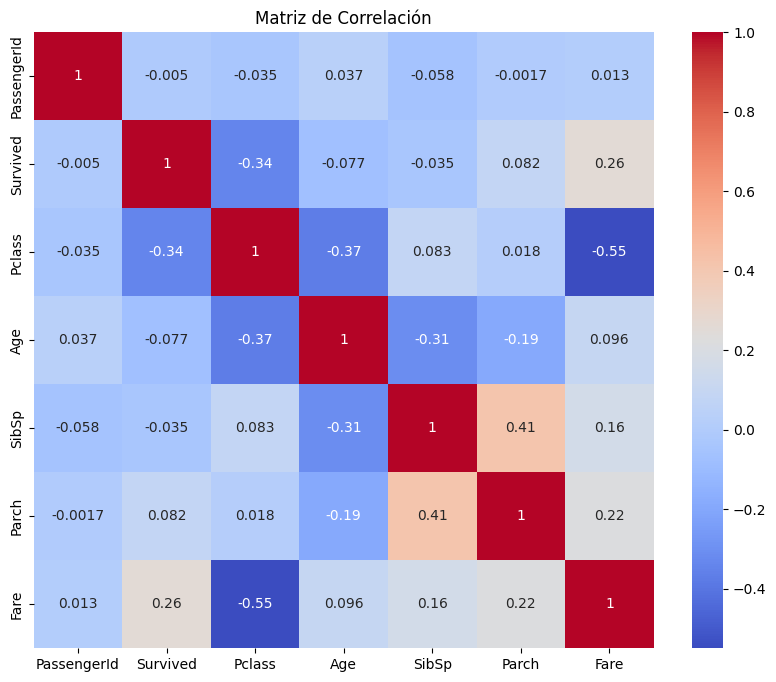

In [11]:
# Filtra las columnas numéricas
Datos_numericos = Datos.select_dtypes(include=['number'])
Datos=Datos_numericos;
# Calcula la matriz de correlación solo para las columnas numéricas
correlacion = Datos.corr()

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

# Visualiza la matriz de correlación utilizando un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

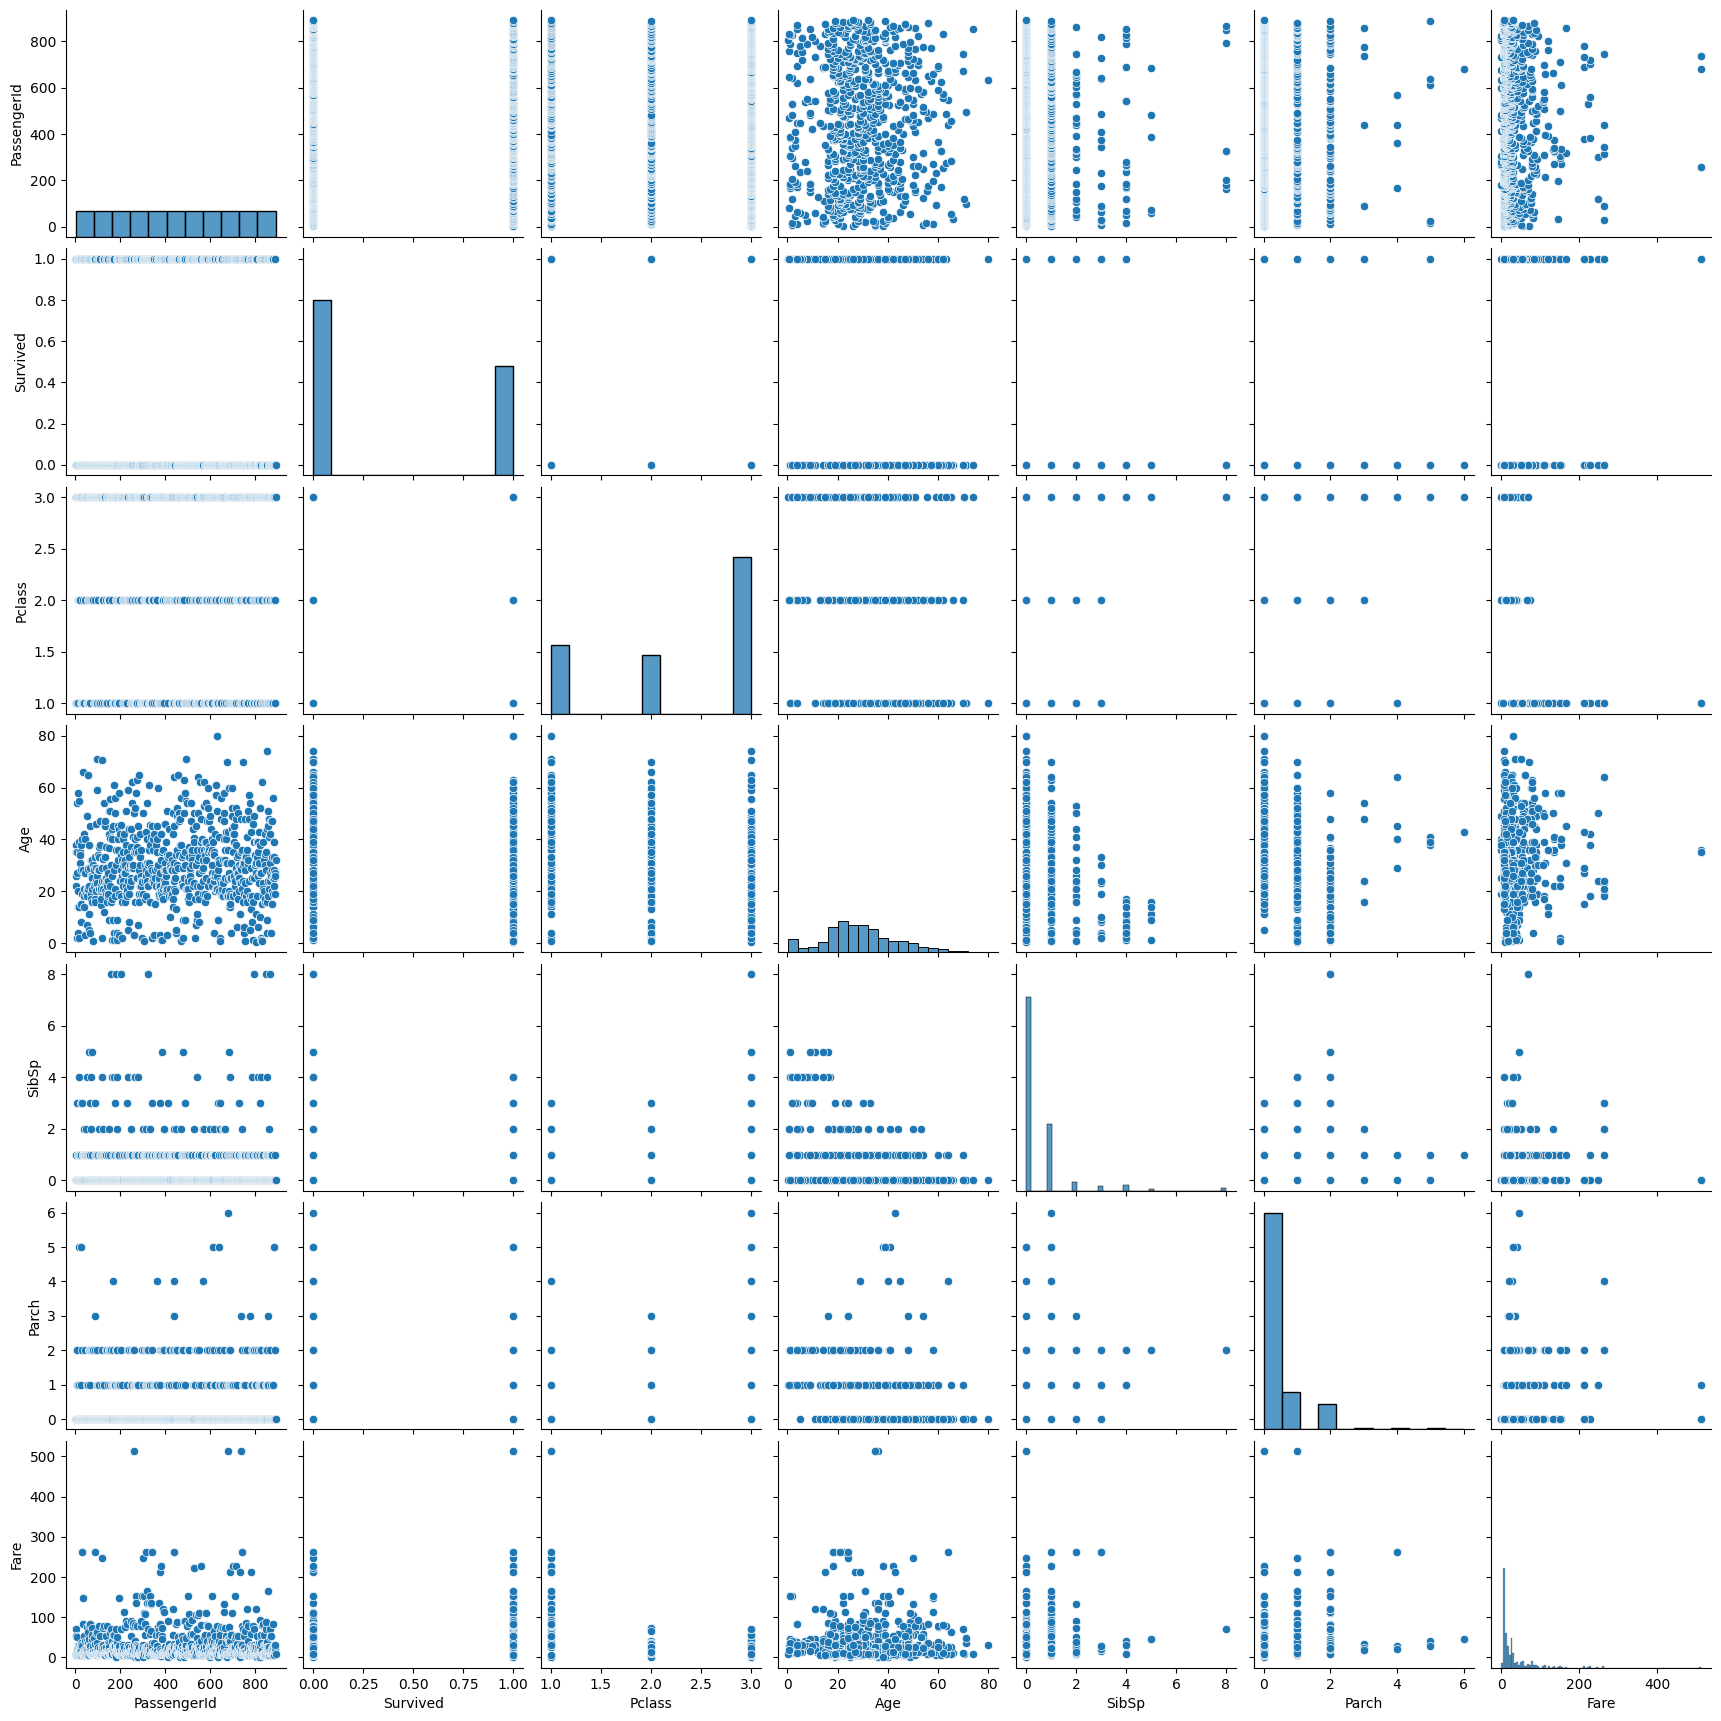

In [6]:
# Gráficos de dispersión para pares de variables
sns.pairplot(Datos)
plt.show()

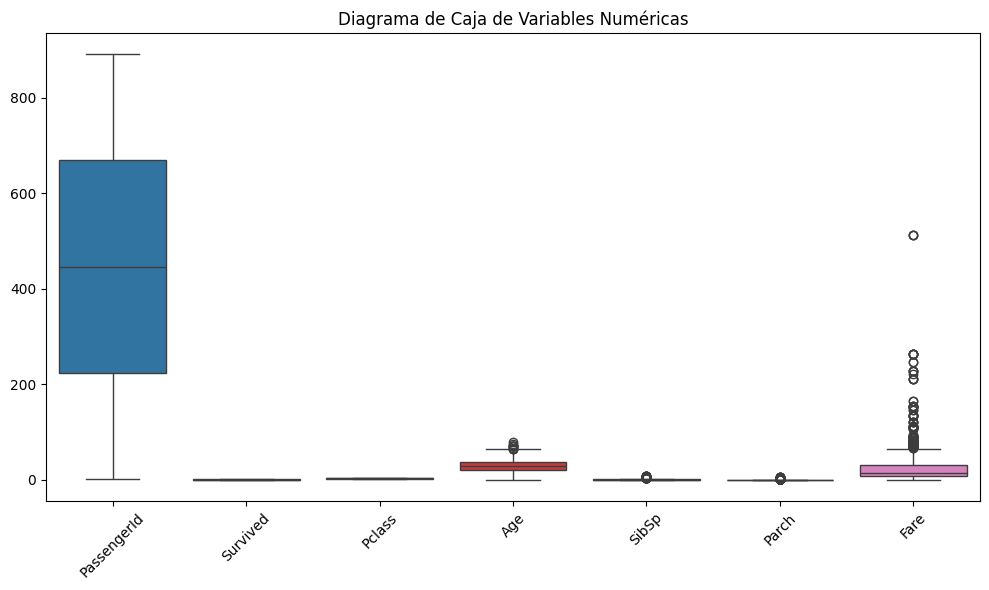

In [7]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=Datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

In [ ]:
Datos.hist(figsize=(12, 10))
plt.show()

# Punto 2.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [8]:
# Verificar si hay valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
#conteo de datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna
datos_atipicos = ((Datos < (Q1 - 1.5 * IQR)) | (Datos > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna
print("Datos atípicos por columna:")
print(datos_atipicos)

Datos atípicos por columna:
PassengerId      0
Survived         0
Pclass           0
Age             11
SibSp           46
Parch          213
Fare           116
dtype: int64


In [17]:
# Filtrar columnas numéricas
Datos_numericos = Datos.select_dtypes(include=['number'])

# Crear un diccionario para almacenar resultados
datos_atipicos_por_columna = {}

# Iterar sobre columnas numéricas
for columna in Datos_numericos.columns:
    # Calcular media y desviación estándar, ignorando valores faltantes
    media = Datos_numericos[columna].mean(skipna=True)
    std = Datos_numericos[columna].std(skipna=True)

    # Definir umbral
    umbral = 3  # Puedes ajustar este valor según tus necesidades

    # Identificar valores atípicos en la columna
    valores_atipicos = ((Datos_numericos[columna] < (media - umbral * std)) | (Datos_numericos[columna] > (media + umbral * std)))

    # Almacenar el número de valores atípicos en el diccionario
    datos_atipicos_por_columna[columna] = valores_atipicos.sum()

    # Reemplazar valores atípicos en el DataFrame original con NaN
    Datos.loc[valores_atipicos, columna] = np.nan

# Eliminar filas con valores atípicos (NaN)
Datos = Datos.dropna()

# Mostrar resultados
print("Forma del DataFrame después de eliminar datos atípicos:", Datos.shape)
print("\nDatos atípicos por columna:")
print(datos_atipicos_por_columna)

Forma del DataFrame después de eliminar datos atípicos: (657, 7)

Datos atípicos por columna:
{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 2, 'SibSp': 30, 'Parch': 15, 'Fare': 20}


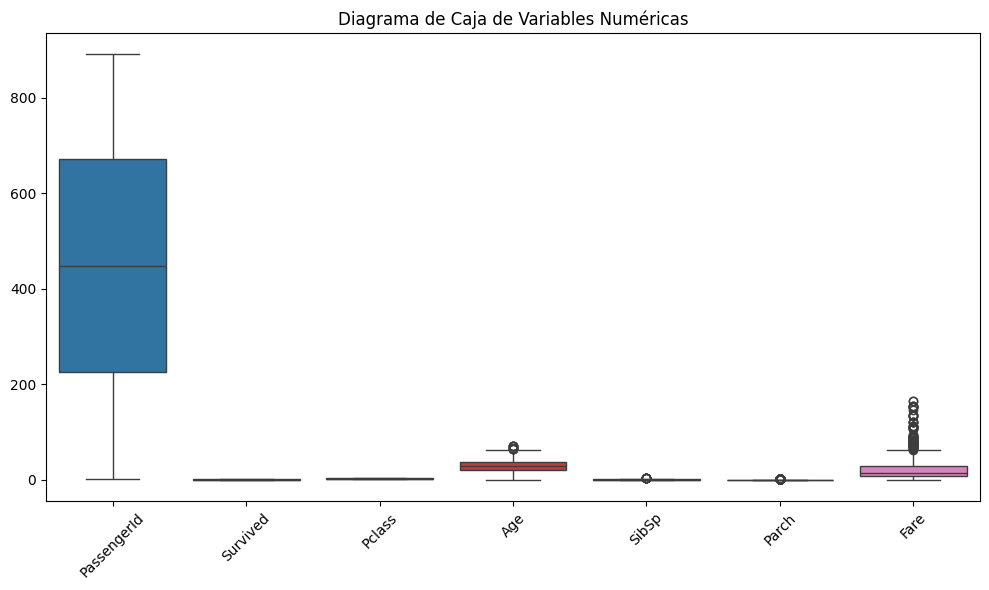

In [18]:
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=Datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

In [19]:
# Verificar si hay valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


# Punto 3.
Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.


In [20]:
# Recuento de los diferentes valores presentes en la columna 'Survived' del DataFrame 'Datos'
Datos['Survived'].value_counts()

Survived
0.0    389
1.0    268
Name: count, dtype: int64

In [22]:

# Mostrar los primeros 20 registros de la columna 'condicion' del DataFrame 'Datos'
Datos[['Survived']].head(20)

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
6,0.0
7,0.0
8,1.0
9,1.0
10,1.0


# Punto 4.
Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [23]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = Datos.drop(columns=['Survived'])  # Características (todas las columnas excepto 'Survived')
y = Datos['Survived']  # Etiquetas (la columna 'Survived')

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento, 20% para prueba)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state= 0)
# Mostrar las formas de los conjuntos de entrenamiento y prueba
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjuto de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (492, 6)
Forma del conjunto de prueba (X_test): (165, 6)
Forma del conjunto de entrenamiento (y_train): (492,)
Forma del conjuto de prueba (y_test): (165,)


# Punto 5.
Entrenar el modelo configurando los diferentes hiperpar metros.


In [24]:
# Construir el modelo de regresión logística

# Inicializar el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")

# Entrenar el modelo utilizando los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Crea el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)

In [25]:
print (y_test)

117    0.0
482    0.0
886    0.0
398    0.0
620    0.0
      ... 
644    1.0
802    1.0
197    0.0
433    0.0
346    1.0
Name: Survived, Length: 165, dtype: float64


In [26]:
print (Prediccion)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0.]


# Punto 6.
 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.


In [27]:
# Desempeño del modelo de regresión

print(classification_report(y_test,Prediccion))

              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77        98
         1.0       0.68      0.48      0.56        67

    accuracy                           0.70       165
   macro avg       0.69      0.66      0.66       165
weighted avg       0.69      0.70      0.68       165



# Punto 7.
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


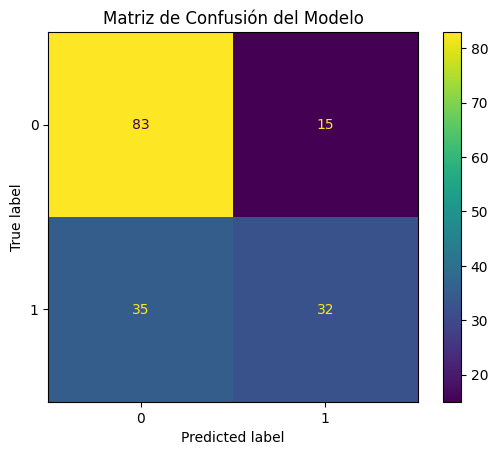

In [28]:

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, Prediccion)

# Crear la visualización de la matriz de confusión
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot()
plt.title('Matriz de Confusión del Modelo')
plt.show()

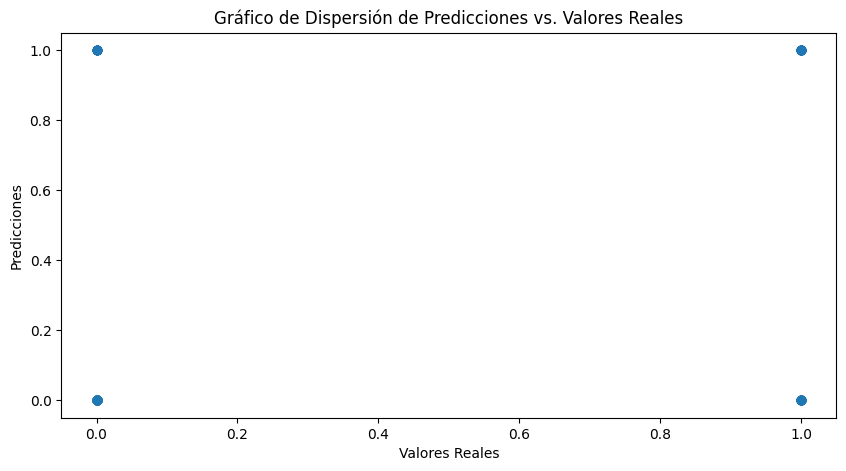

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, Prediccion)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de Dispersión de Predicciones vs. Valores Reales')
plt.show()

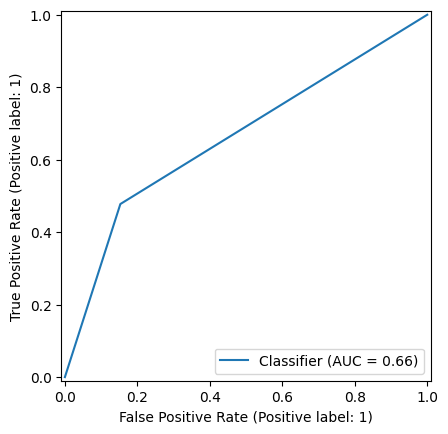

In [30]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay # type: ignore
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()

# Punto 8.
Interpretar, analizar y documentar los resultados obtenidos..

## Interpretación y Análisis de Datos:



* Para la interpretación de los datos, comenzamos cargando el conjunto de datos que contiene las variables relacionadas con la presencia o ausencia de enfermedades cardíacas en los individuos.
* En segundo lugar, realizamos la exploración de datos (EDA), que incluye varias etapas. Inicialmente, cargamos y leemos el dataset, y antes de eso, llevamos a cabo una traducción de los datos al español.
* En tercer lugar, llevamos a cabo la exploración univariante, bivariante y multivariante mediante el uso de diagramas de dispersión y correlación.
* En cuarto lugar, detectamos todos los valores atípicos utilizando diagramas de caja y los eliminamos.
* Después de identificar los datos atípicos o nulos, avanzamos a la siguiente fase.

## Pre-procesamiento de Datos:

* Se limpian los datos, asegurando que los valores nulos sean completados mediante la media o el interpolado, de modo que se imputen los datos faltantes.
* Además, se eliminan los datos atípicos, seguido de una verificación de los valores para asegurar la integridad de los mismos.

## Selección de Características Relevantes:



* Seleccionamos la caracteristica mas relevante, con el fin de poder entrenar el modelo de datos, siendo esta variable la que indica si el paciente sobrevivio.

## Entrenamiento del Modelo:

* Usando la librería scikit-learn, podemos generar y construir un modelo de regresión logística. Ajustamos los datos al algoritmo para poder predecir el resultado, lo que nos permite clasificar o etiquetar nuestros resultados en una sola categoría.

* Posteriormente, se realizan predicciones utilizando dicho modelo y se evalúa su desempeño mediante la clasificación de los datos de prueba.

## Evaluación del Desempeño del Modelo:

Al evaluar el modelo de clasificación, se utilizó la función `classification_report(y_test,Prediccion)` para medir la precisión del clasificador, generando la siguiente tabla, que permite observar la precisión, recall, f1-score y support:

Se observa un buen rendimiento general: El modelo tiene una precisión (accuracy) del 70%, lo que significa que predice correctamente el 70% de las instancias tanto positivas como negativas). Esto sugiere un rendimiento general aceptable.

- Mejor en la predicción de la clase 0:

  -  Precisión (Precision): La precisión para la clase 0 es del 70%, lo que indica que de todas las instancias predichas como clase 0, el 70% son realmente de la clase 0.
Recall (Sensibilidad): El recall para la clase 0 es del 85%, lo que significa que el modelo es capaz de identificar correctamente el 85% de todas las instancias que realmente pertenecen a la clase 0.
- Desempeño moderado en la predicción de la clase 1:

  - Precisión: La precisión para la clase 1 es del 68%, lo que sugiere que de todas las instancias predichas como clase 1, el 68% son realmente de la clase 1.
Recall: El recall para la clase 1 es del 48%, lo que significa que el modelo solo identifica correctamente el 48% de todas las instancias que realmente pertenecen a la clase 1.

## Visualización de Resultados:

* Los resultados se presentan mediante matrices de confusión, curvas de precisión y gráficos de dispersión frente a los valores reales, resaltando el eficaz desempeño del modelo en la clasificación binaria de la presencia y ausencia de enfermedades cardíacas.

- Análisis de la curva ROC:

  - Interpretación del AUC:  El AUC representa la capacidad del modelo para distinguir entre las clases positivas y negativas. Un valor de AUC de 0.5 indica que el modelo no es mejor que una elección aleatoria, mientras que un AUC de 1.0 representa un modelo perfecto. En este caso, el AUC de 0.66 sugiere que el modelo tiene un rendimiento moderado, mejor que una elección al azar, pero con margen de mejora.

  - Forma de la curva: La curva ROC muestra la relación entre la tasa de verdaderos positivos (True Positive Rate o TPR) y la tasa de falsos positivos (False Positive Rate o FPR) para diferentes umbrales de decisión del clasificador. Idealmente, queremos una curva que se eleve rápidamente hacia la esquina superior izquierda, lo que indica un alto TPR y un bajo FPR. En esta imagen, la curva se eleva inicialmente, pero luego se aplana, lo que sugiere que el modelo tiene dificultades para mantener un alto TPR sin aumentar significativamente el FPR a medida que se relaja el umbral de decisión.

- Análisis de la matriz de confusión:

  - Verdaderos Positivos (VP): 32 instancias fueron correctamente clasificadas como clase 1.
  - Verdaderos Negativos (VN): 83 instancias fueron correctamente clasificadas como clase 0.
  - Falsos Positivos (FP): 15 instancias fueron incorrectamente clasificadas como clase 1 cuando en realidad eran clase 0.
  - Falsos Negativos (FN): 35 instancias fueron incorrectamente clasificadas como clase 0 cuando en realidad eran clase 1.

# Concluciones 

- Rendimiento general moderado: El modelo tiene una exactitud del 70%, lo cual es un punto de partida aceptable, pero indica que hay margen de mejora.
- Mejor en identificar la clase 0 (negativos): El modelo es más preciso en clasificar correctamente las instancias de la clase 0, como se evidencia por los 83 verdaderos negativos.
- Dificultad en identificar la clase 1 (positivos): El modelo tiene dificultades para identificar correctamente las instancias de la clase 1, con un recall de solo 48%. Esto significa que casi la mitad de las instancias reales de la clase 1 se clasifican erróneamente como clase 0.
- Posible desbalance de clases: La diferencia en el número de instancias entre las clases (más de la clase 0 que de la 1) sugiere un posible desbalanceo en los datos, lo que podría estar afectando el rendimiento del modelo en la clase 1.